# Lab 1 Analysis Example using Thicket

In [96]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [97]:
tk = th.Thicket.from_caliperreader(glob("*random.cali"))
tk.statsframe.dataframe["time"] = 1

In [98]:
# Performance data
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 MPI_Barrier
│  └─ 1.000 comm_large
│     ├─ 1.000 MPI_Gather
│     └─ 1.000 MPI_Scatter
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [99]:
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              94276197      1   
                                                  1898519320    1   
                                                  2039840440    1   
                                                  2267451053    1   
                                                  3211007287    1   
                                                  3576837185    1   
                                                  4235843964    1   
{'name': 'comm', 'type': 'function'}              94276197      3   
                                                  1898519320    3   
                                                  2039840440    3   
                                                  2267451053    3   
                                                  3211007287    3   
                                                  3576837185    3   
                                                  4235843964    3   
{'name': 'MPI_Barrier', 'type': 'function'}       94276197      4   
                                                  1898519320    4   
                                                  2039840440    4   
                                                  2267451053    4   
                                                  3211007287    4   
                                                  3576837185    4   
                                                  4235843964    4   
{'name': 'comm_large', 'type': 'function'}        94276197      5   
                                                  1898519320    5   
                                                  2039840440    5   
                                                  2267451053    5   
                                                  3211007287    5   
                                                  3576837185    5   
                                                  4235843964    5   
{'name': 'MPI_Gather', 'type': 'function'}        94276197      7   
                                                  1898519320    7   
                                                  2039840440    7   
                                                  2267451053    7   
                                                  3211007287    7   
                                                  3576837185    7   
                                                  4235843964    7   
{'name': 'MPI_Scatter', 'type': 'function'}       94276197      6   
                                                  1898519320    6   
                                                  2039840440    6   
                                                  2267451053    6   
                                                  3211007287    6   
                                                  3576837185    6   
                                                  4235843964    6   
{'name': 'comp', 'type': 'function'}              94276197      8   
                                                  1898519320    8   
                                                  2039840440    8   
                                                  2267451053    8   
                                                  3211007287    8   
                                                  3576837185    8   
                                                  4235843964    8   
{'name': 'comp_large', 'type': 'function'}        94276197      9   
                                                  1898519320    9   
                                                  2039840440    9   
                                                  2267451053    9   
                                                  3211007287    9   
                                                  3576837185    9   
                                                  4235843964    9   
{'name': 'correctness_check', 'type': 'function'} 94276197  

In [100]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,num_procs,num_threads,num_blocks,group_num,implementation_source,Whole computation time
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
94276197,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a1048576-random.cali,true,1700090538,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortMPI, 1048576, random]",c,Bucketsort,MPI,int,4,1048576,2,1,1,19,Handwritten,0.325883
1898519320,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a1048576-random.cali,true,1700090667,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortMPI, 1048576, random]",c,Bucketsort,MPI,int,4,1048576,16,1,1,19,Handwritten,0.743009
2039840440,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a1048576-random.cali,true,1700090568,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortMPI, 1048576, random]",c,Bucketsort,MPI,int,4,1048576,8,1,1,19,Handwritten,0.328449
2267451053,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p32-a1048576-random.cali,true,1700090667,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortMPI, 1048576, random]",c,Bucketsort,MPI,int,4,1048576,32,1,1,19,Handwritten,1.383260
3211007287,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a1048576-random.cali,true,1700090568,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortMPI, 1048576, random]",c,Bucketsort,MPI,int,4,1048576,4,1,1,19,Handwritten,0.326094
3576837185,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p128-a1048576-random.cali,true,1700090890,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortMPI, 1048576, random]",c,Bucketsort,MPI,int,4,1048576,128,1,1,19,Handwritten,5.443695
4235843964,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a1048576-random.cali,true,1700090696,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bucketsortMPI, 1048576, random]",c,Bucketsort,MPI,int,4,1048576,64,1,1,19,Handwritten,2.835355


In [134]:
gb = tk.groupby("InputSize")

1  thickets created...
{1048576: <thicket.thicket.Thicket object at 0x2acfee8f4640>}


Compose these 3 groups column-wise to get a holistic view of the data

In [135]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="mpi.world.size"
)

In [136]:
ctk.dataframe

1048576  \
                                                                     nid   
node                                              mpi.world.size           
{'name': 'main', 'type': 'function'}              2                    1   
                                                  4                    1   
                                                  8                    1   
                                                  16                   1   
                                                  32                   1   
                                                  64                   1   
                                                  128                  1   
{'name': 'comm', 'type': 'function'}              2                    3   
                                                  4                    3   
                                                  8                    3   
                                                  16                   3   
                                                  32                   3   
                                                  64                   3   
                                                  128                  3   
{'name': 'MPI_Barrier', 'type': 'function'}       2                    4   
                                                  4                    4   
                                                  8                    4   
                                                  16                   4   
                                                  32                   4   
                                                  64                   4   
                                                  128                  4   
{'name': 'comm_large', 'type': 'function'}        2                    5   
                                                  4                    5   
                                                  8                    5   
                                                  16                   5   
                                                  32                   5   
                                                  64                   5   
                                                  128                  5   
{'name': 'MPI_Gather', 'type': 'function'}        2                    7   
                                                  4                    7   
                                                  8                    7   
                                                  16                   7   
                                                  32                   7   
                                                  64                   7   
                                                  128                  7   
{'name': 'MPI_Scatter', 'type': 'function'}       2                    6   
                                                  4                    6   
                                                  8                    6   
                                                  16                   6   
                                                  32                   6   
                                                  64                   6   
                                                  128                  6   
{'name': 'comp', 'type': 'function'}              2                    8   
                                                  4                    8   
                                                  8                    8   
                                                  16                   8   
                                                  32                   8   
                                                  64                   8   
                                                  128                  8   
{'name': 'comp_large', 'type': 'function'}        2                    9   
                                     

Perform pandas operations to get the table in a desirable format for plotting

In [137]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (1048576, "nid"), (1048576, "spot.channel")], axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("mpi.world.size", ""): "mpi.world.size"}).set_index(["name", "mpi.world.size"])

In [138]:
ctk.dataframe

1048576                              \
                                 Min time/rank Max time/rank Avg time/rank   
name              mpi.world.size                                             
main              2                   0.307898      0.604069      0.455983   
                  4                   0.321849      0.613676      0.396680   
                  8                   0.381673      0.822363      0.549731   
                  16                  6.132533      7.161777      6.523137   
                  32                  6.380453      7.958019      6.751868   
                  64                  1.609906      4.016282      1.759413   
                  128                 2.861969      7.699905      3.169736   
comm              2                   0.007105      0.048054      0.027580   
                  4                   0.006249      0.045396      0.032752   
                  8                   0.008560      0.042357      0.034311   
                  16                  0.070190      0.148806      0.123508   
                  32                  0.085066      0.272779      0.207312   
                  64                  0.252262      0.531287      0.470005   
                  128                 0.331215      0.764292      0.669789   
MPI_Barrier       2                   0.004123      0.043427      0.023775   
                  4                   0.004248      0.043378      0.030732   
                  8                   0.005584      0.040048      0.031403   
                  16                  0.043217      0.139307      0.098885   
                  32                  0.044928      0.272597      0.203614   
                  64                  0.114201      0.524673      0.447225   
                  128                 0.125640      0.741467      0.611468   
comm_large        2                   0.002940      0.004573      0.003757   
                  4                   0.001957      0.001983      0.001968   
                  8                   0.002209      0.003833      0.002850   
                  16                  0.009400      0.039926      0.024558   
                  32                  0.000130      0.040085      0.003539   
                  64                  0.000154      0.138006      0.022720   
                  128                 0.000129      0.205521      0.058261   
MPI_Gather        2                   0.000492      0.000506      0.000499   
                  4                   0.000433      0.000514      0.000464   
                  8                   0.000701      0.001429      0.001215   
                  16                  0.000070      0.039310      0.015911   
                  32                  0.000036      0.038865      0.001537   
                  64                  0.000040      0.113022      0.018587   
                  128                 0.000037      0.158394      0.036601   
MPI_Scatter       2                   0.002415      0.004032      0.003223   
                  4                   0.001420      0.001489      0.001470   
                  8                   0.000868      0.002517      0.001594   
                  16                  0.000375      0.019895      0.007990   
                  32                  0.000067      0.028890      0.001970   
                  64                  0.000038      0.033997      0.004091   
                  128                 0.000046      0.129975      0.021595   
comp              2                   0.291728      0.291728      0.291728   
                  4                   0.293179      0.293179      0.293179   
                  8                   0.292941      0.292941      0.292941   
                  16                  0.575337      0.575337      0.575337   
                  32                  1.165538      1.165538      1.165538   
                  64                  2.352258      2.352258      2.352258   
                  128                 4.673814      4.673814 

In [139]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("mpi.world.size"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [140]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [141]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [142]:
ctk.dataframe.loc["main"]

1048576                                          \
               Min time/rank Max time/rank Avg time/rank  Total time   
mpi.world.size                                                         
2                   0.307898      0.604069      0.455983    0.911967   
4                   0.321849      0.613676      0.396680    1.586720   
8                   0.381673      0.822363      0.549731    4.397844   
16                  6.132533      7.161777      6.523137  104.370186   
32                  6.380453      7.958019      6.751868  216.059790   
64                  1.609906      4.016282      1.759413  112.602436   
128                 2.861969      7.699905      3.169736  405.726239   

                                   
               Variance time/rank  
mpi.world.size                     
2                        0.021929  
4                        0.015700  
8                        0.013065  
16                       0.048286  
32                       0.064804  
64                       0.082043  
128                      0.166014

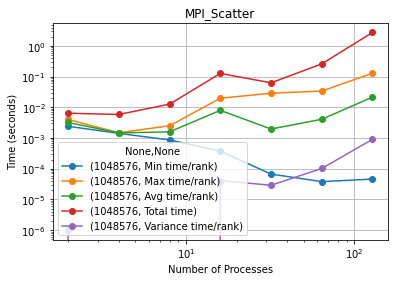

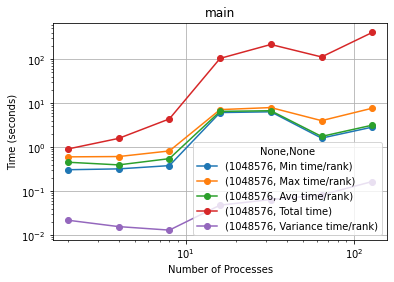

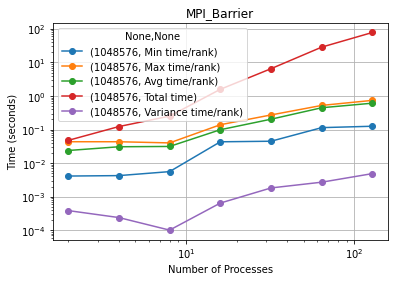

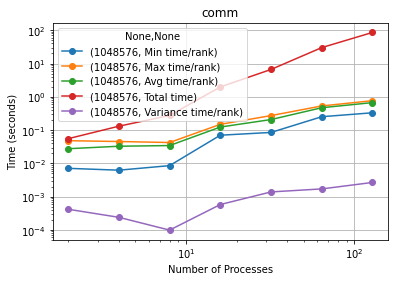

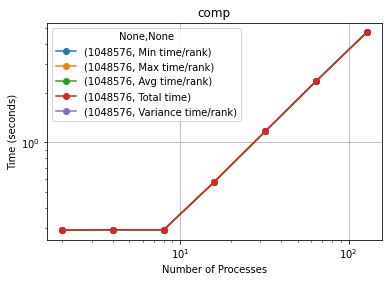

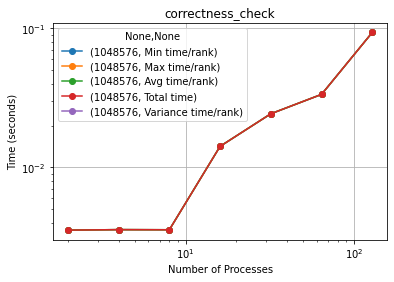

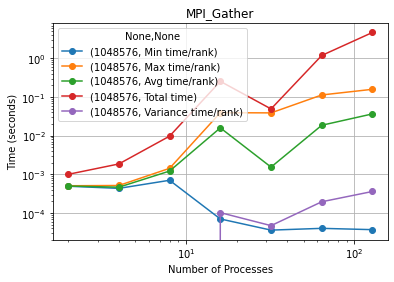

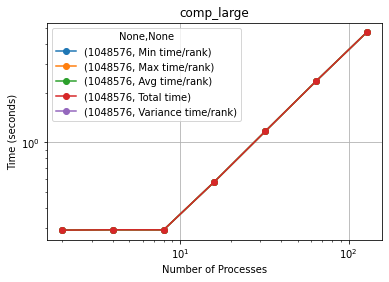

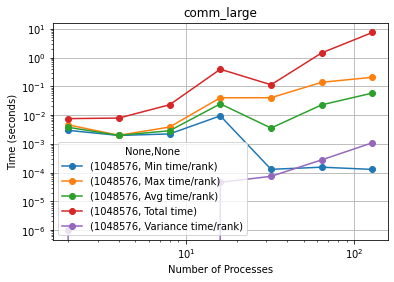

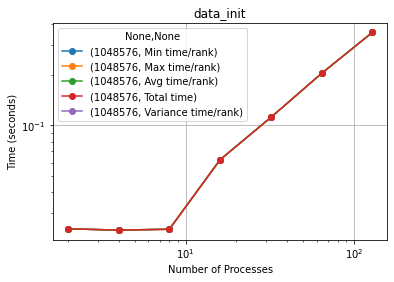

In [147]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Number of Processes",
        ylabel="Time (seconds)",
        loglog=True
    )

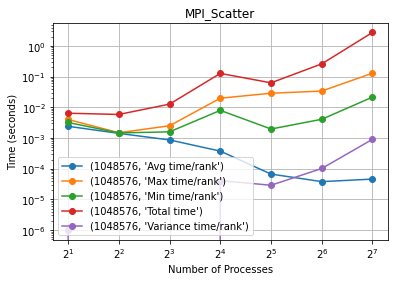

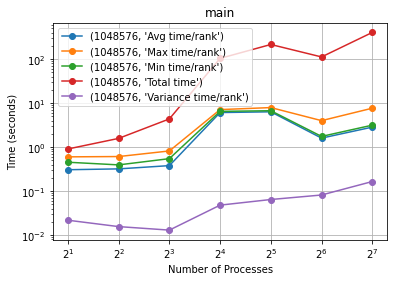

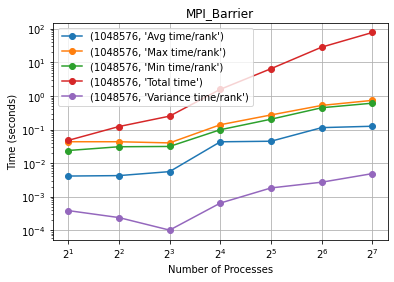

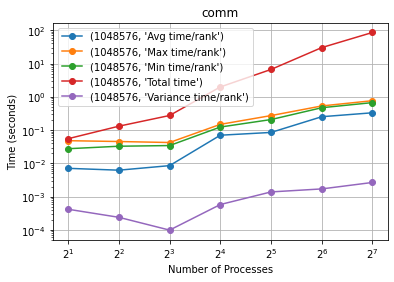

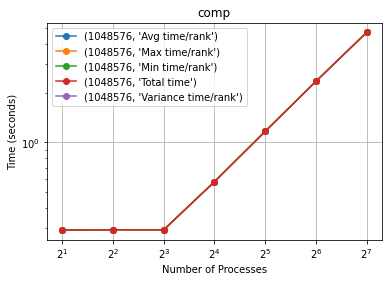

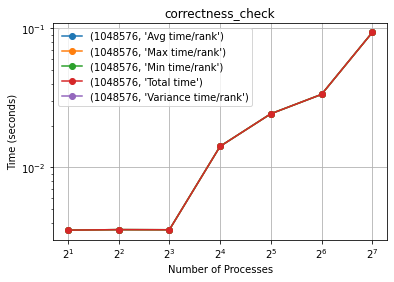

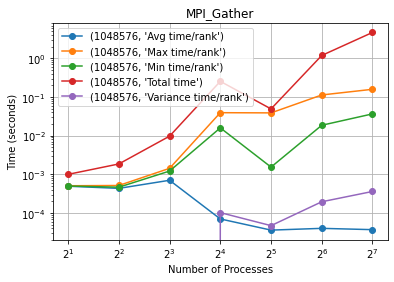

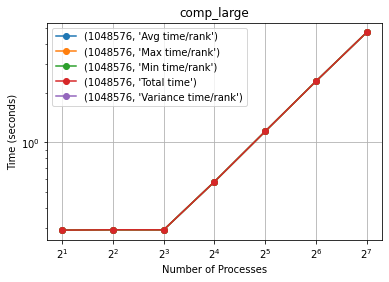

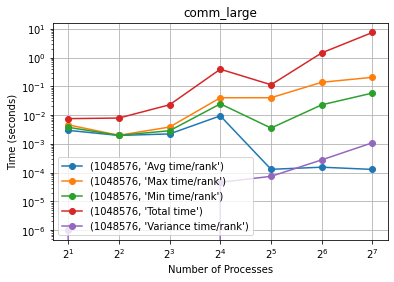

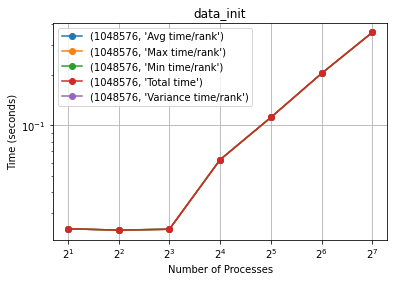

In [148]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Number of Processes",
        ylabel="Time (seconds)",
    )

## Speedup

In [146]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("main")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )

KeyError: 1